<a href="https://colab.research.google.com/github/MichalZZyla/Data-analysis/blob/main/Supervised_Learning_Regression_Problem_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [117]:
# required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Import data

In [118]:
url = 'https://raw.githubusercontent.com/MichalZZyla/Supervised_ML/main/insurance.csv'
df = pd.read_csv(url)
print(df.head())
print(df.info())
print(df.describe())

# iterating the columns
for col in df.columns:
    print(col)


print(df.region.unique())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
               age          bmi     children       charges
count  1338.000000  1338.000000 

** THERE IS NO NULL Values so we dont need to exclude or predict it
**

# Data Exploration

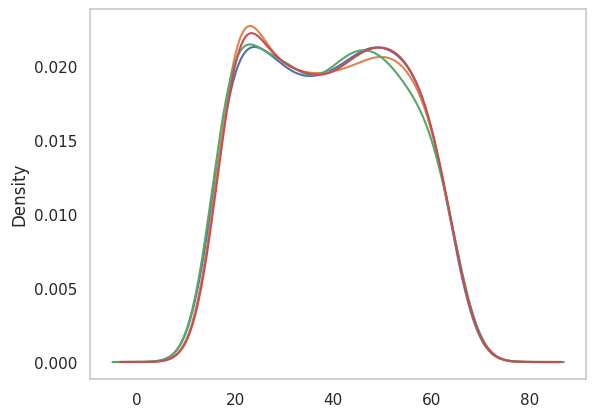

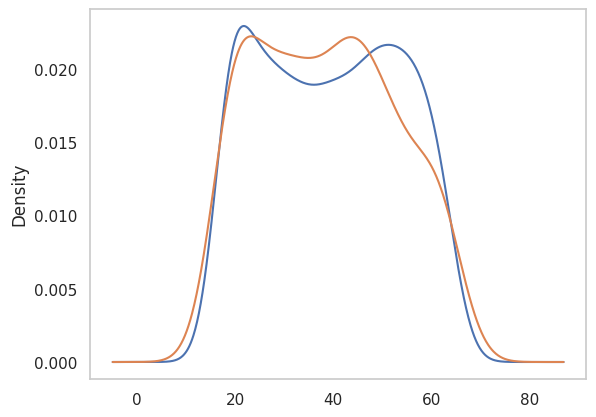

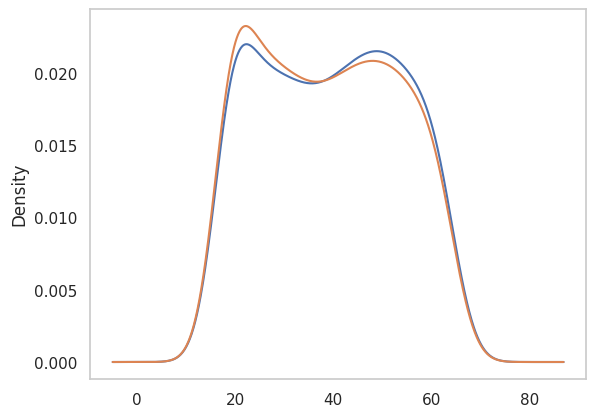

In [119]:
# Age distribution based on region

df.groupby('region').age.plot(kind='kde')

plt.grid()
plt.show()

# Age distribution based on smoker status

df.groupby('smoker').age.plot(kind='kde')
plt.grid()
plt.show()

# ge distribution based on sex

df.groupby('sex').age.plot(kind='kde')
plt.grid()
plt.show()

# df.groupby('sex').count()['age'].hist(bins=20) to check on hist


<Axes: xlabel='charges', ylabel='Density'>

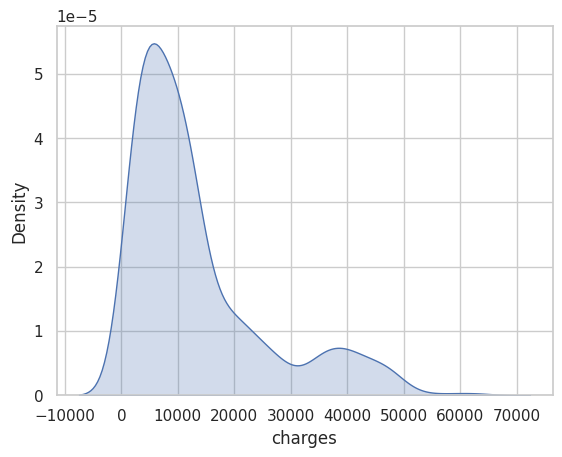

In [120]:
sns.kdeplot(df['charges'], fill=True)

<Axes: xlabel='charges'>

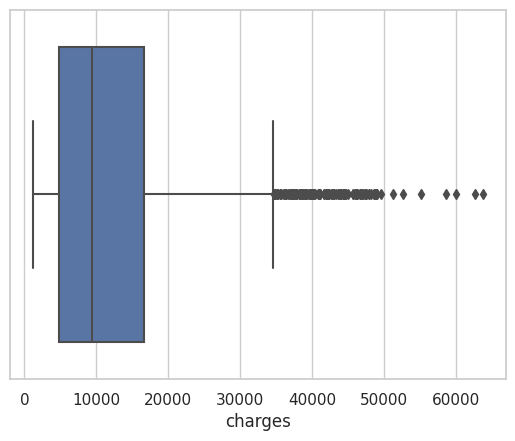

In [121]:
sns.boxplot(x=df['charges'])

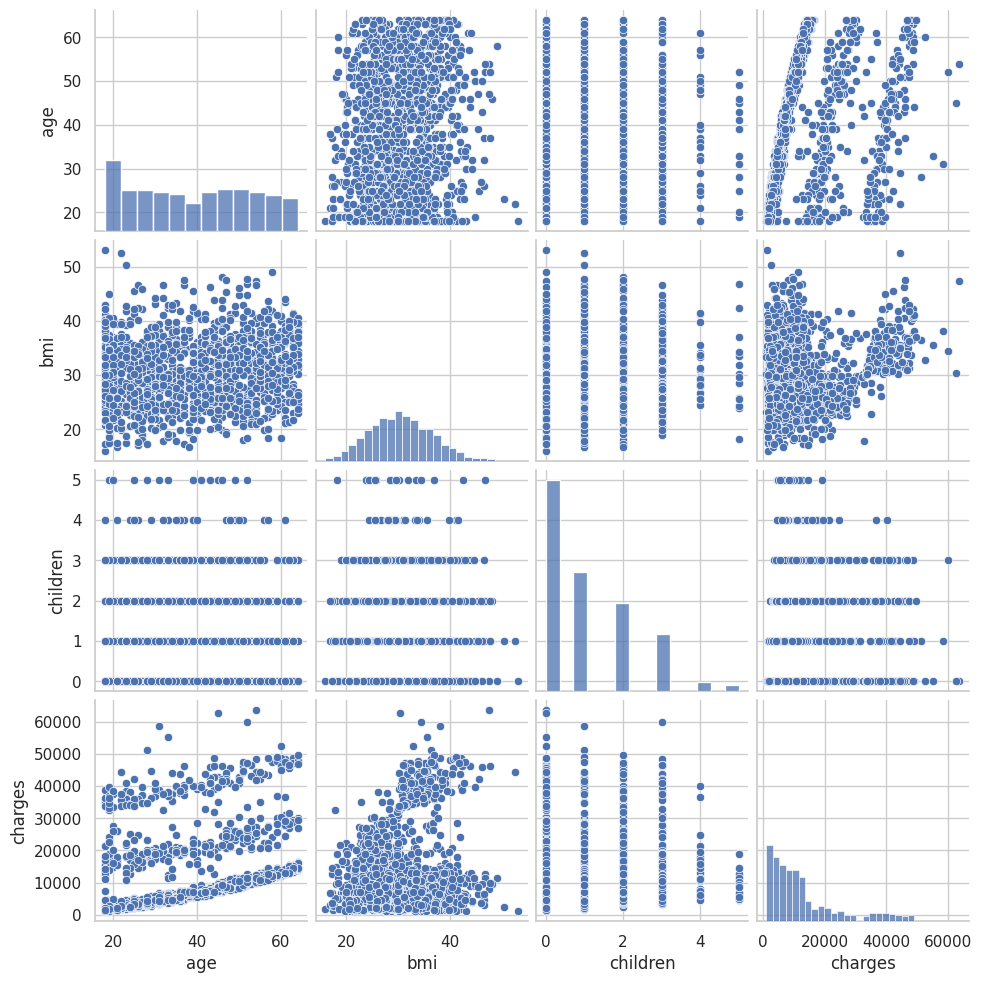

In [122]:
sns.pairplot(df)

<Axes: >

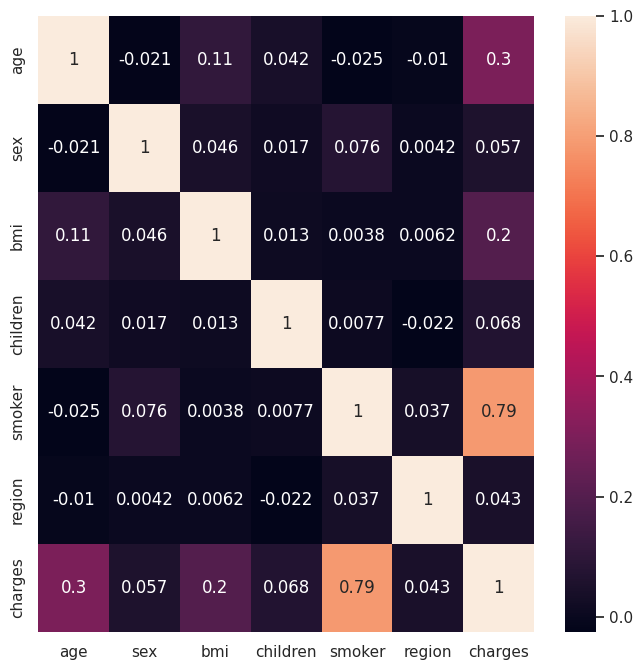

In [123]:
# Feature encoding heatmap require format of numbers instead of text.


df['sex'] = df['sex'].replace('female',0).replace('male',1)
df['smoker'] = df['smoker'].replace('no',0).replace('yes',1)
df['region'] = df['region'].replace('southwest',0).replace('southeast',1).replace('northwest',1).replace('northeast',1)
# ['southwest' 'southeast' 'northwest' 'northeast']

fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(df.corr(),annot=True,ax=ax)

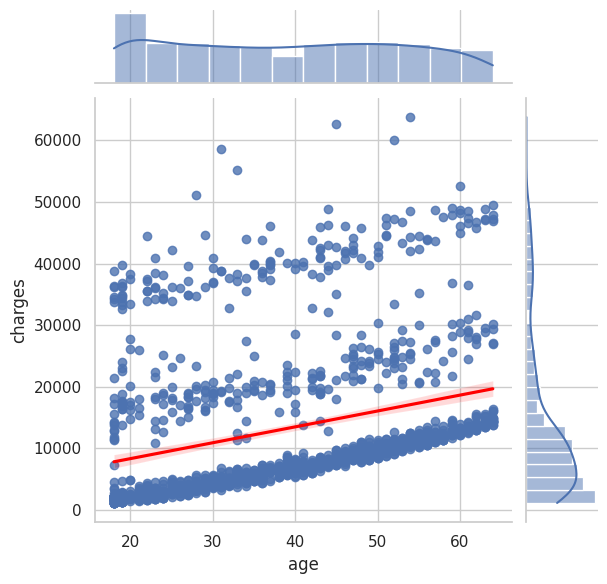

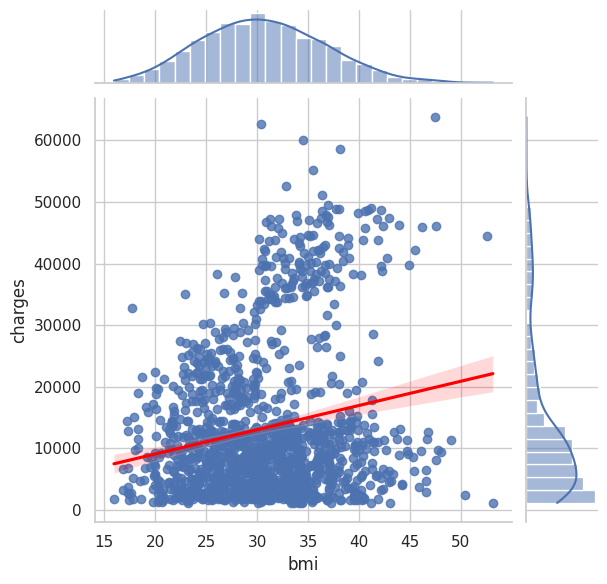

In [124]:
# another check using Join Plots ( for visualizng the relationship between smoker and charges )
sns.set(style="whitegrid")
sns.jointplot(x='age', y='charges', data=df, kind="reg", line_kws={'color':'red'})


# we can confirm as higher age is a risk factor for higher charges what is expected


sns.jointplot(x='bmi', y='charges', data=df,  kind="reg", line_kws={'color':'red'})

Smoking status appears to be the most strongly correlated variable with insurance charges (0.79 ) , implying a substantial impact on insurance costs.
Age follows, indicating a moderate influence on insurance charges (0.3).
BMI has a weaker (0.2) relationship compared to age, but its specific impact depends on the actual correlation coefficient. The rest of the variables are less important. The remaining variables exhibit comparatively lower importance in relation to insurance charges.

# Clean data

In [125]:
# Split data

y = df['charges']
X = df.drop('charges', axis = 1)






In [126]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 100)

In [127]:

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

y_lr_train_pred = lr.predict(X_train)
y_lr_test_pred = lr.predict(X_test)
print()


y_lr_train_pred

array([26208.86943366, 12540.24666826, 15422.28732058, ...,
       10581.33795175,  9246.64826198,  1304.60981417])

In [128]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)


print('LR MSE (Train):', lr_train_mse)
print('LR R2 (Train):', lr_train_r2)
print('LR MSE (Test):', lr_test_mse)
print('LR R2 (Test):', lr_test_r2)



LR MSE (Train): 37755461.273589835
LR R2 (Train): 0.7373729561141075
LR MSE (Test): 32456306.07208669
LR R2 (Test): 0.7930189189205396


In [129]:

lr_results = pd.DataFrame ( ['Linear regression',lr_train_mse,lr_train_r2,lr_test_mse,lr_test_r2]).transpose()
lr_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
lr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,37755461.27359,0.737373,32456306.072087,0.793019
